Hi, this is my project regarding the happiness of countries around the world

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Here's the csv file for the history of the happinesses for all the countries

In [79]:
df=pd.read_csv('World-happiness-report-updated_2024.csv')
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [80]:
df.tail()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
2358     Zimbabwe  2019        2.694               7.698           0.759   
2359     Zimbabwe  2020        3.160               7.596           0.717   
2360     Zimbabwe  2021        3.155               7.657           0.685   
2361     Zimbabwe  2022        3.296               7.670           0.666   
2362     Zimbabwe  2023        3.572               7.679           0.694   

      Healthy life expectancy at birth  Freedom to make life choices  \
2358                            53.100                         0.632   
2359                            53.575                         0.643   
2360                            54.050                         0.668   
2361                            54.525                         0.652   
2362                            55.000                         0.735   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
2358      -0.051                      0.831            0.658            0.235  
2359       0.003                      0.789            0.661            0.346  
2360      -0.079                      0.757            0.610            0.242  
2361      -0.073                      0.753            0.641            0.191  
2362      -0.069                      0.757            0.610            0.179

Showing how generous on average people are in the country, lighter shades are more generous (we don't have all the countries for every year)

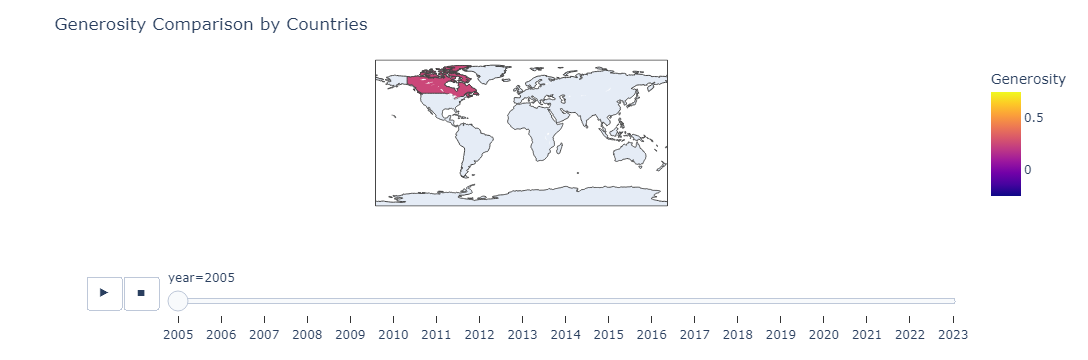

In [81]:
import plotly.express as px
fig = px.choropleth(df.sort_values('year'),
                   locations = 'Country name',
                   color = 'Generosity',
                   locationmode = 'country names',
                   animation_frame = 'year')
fig.update_layout(title = 'Generosity Comparison by Countries')
fig.show()

Now we're going to check the history of happiness of countries (lighter is more happy).
The term life ladder is a scale from 1-10 based on how happy they were on a "life ladder"

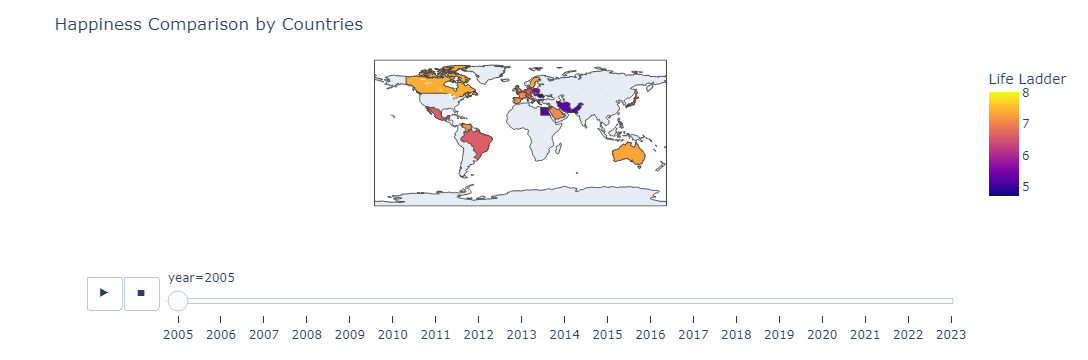

In [82]:
fig = px.choropleth(df.sort_values('year'), 
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title = 'Happiness Comparison by Countries' )

Is there a correlation between life expectancy and life ladder? We can check by the 2024 world happiness.

In [83]:
df1=pd.read_csv('World-happiness-report-2024.csv')
df1.head()

Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.859       0.142                      0.546   
1                         0.823       0.204                      0.548   
2                         0.819       0.258                      0.182   
3                         0.838       0.221                      0.524   
4                         0.641       0.153                      0.193   

   Dystopia + residual  
0                2.082  
1                1.881  
2                2.050  
3                1.658  
4                2.298

In [84]:
df1['Ladder score'].corr(df1['Healthy life expectancy'])

0.7596593784588567

Yep! There sure is!
We could do this for all of the columns, as shown below

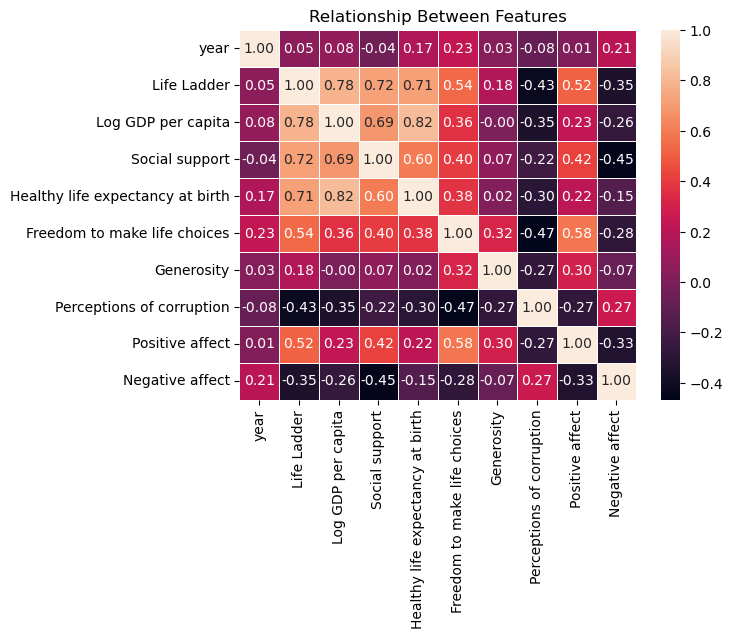

In [85]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7)
plt.title('Relationship Between Features')
plt.show()

The lighter color squares show higher correlation between two features, for example, life expectancy is highly correlated with GDP per capita